<h1 style="text-align:center; color:purple">House price prediction using Linear regression</h1>

<h2 style="text-align:center; color:pink">Presentation</h2>

<center>
    In this project, I will use linear regression with multiple features to crate a model to predict the price of a house based on the house's features (bedrooms, bathrooms, sqft, floors, condition, grade, yr_built) in King County. We will then optimise our model so it can run faster.     
I will use images to add handwritten notes in the notebook. <br/>
    - Soraya PANAMBALOM
</center>

<h2>1 - Installations and Imports</h2>

In [180]:
%%capture
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install scipy
from scipy.stats import norm
from IPython.display import Image, display

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
%matplotlib inline

<h2>2 - Load dataset inside the file</h2>

You can find the dataset at "https://www.kaggle.com/datasets/gauravduttakiit/predict-the-house-prices-king-county?select=kc_house_data.csv" - Predict the House Prices - King County.

I have modified the data, you can see below the data description:

price: the price of the house in US dollars (I used US dollars because King county is situated in the USA). This is our target variable. <br/>
bedrooms: Number of bedrooms <br/>
bathrooms: Number of bathrooms<br/>
sqft: Square feet the house<br/>
floors: Number of floors<br/>
condition: 1 indicates worn-out property and 5 excellent<br/>
grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor,13 excellent<br/>
yr_built: Year of the house built<br/>

To load the data I used the library "pandas", the data is in a csv file named "dataset-houseprice2.csv" you can find it in the project folder at "HousePricePredictionLinearRegression/dataset-houseprice2.csv".

In [182]:
# Load data
data = pd.read_csv('dataset-houseprice2.csv')

In [183]:
# Visualize data
data.head()

,price,bedrooms,bathrooms,sqft,floors,condition,grade,yr_built
0,221900.0,3,1.00,1180,1.0,3,7,1955
1,538000.0,3,2.25,2570,2.0,3,7,1951
2,180000.0,2,1.00,770,1.0,3,6,1933
3,604000.0,4,3.00,1960,1.0,5,7,1965
4,510000.0,3,2.00,1680,1.0,3,8,1987


<h2>3 - Visualize the data</h2>

In [184]:
# Take the dataset and drop the "Price" variable so we can load the "inputs" data inside the variable "X_train"
X_train = data.drop(columns=['price']).values.tolist()
X_features = ['bedrooms', 'bathrooms', 'sqft', 'floors', 'condition', 'grade', 'yr_built']
# Convert into a numpy array so we can work with the data
X_train = np.array(X_train)
print(X_train)

[[3.000e+00 1.000e+00 1.180e+03 ... 3.000e+00 7.000e+00 1.955e+03]
 [3.000e+00 2.250e+00 2.570e+03 ... 3.000e+00 7.000e+00 1.951e+03]
 [2.000e+00 1.000e+00 7.700e+02 ... 3.000e+00 6.000e+00 1.933e+03]
 ...
 [3.000e+00 2.000e+00 2.330e+03 ... 3.000e+00 7.000e+00 1.986e+03]
 [4.000e+00 3.000e+00 2.170e+03 ... 3.000e+00 8.000e+00 1.997e+03]
 [3.000e+00 2.000e+00 1.760e+03 ... 4.000e+00 7.000e+00 1.943e+03]]


In [185]:
# Load the "targets" data inside the "y_train" variable
y_train = data['price']
# Convert into a numpy array so we can work with the data
y_train = np.array(y_train)

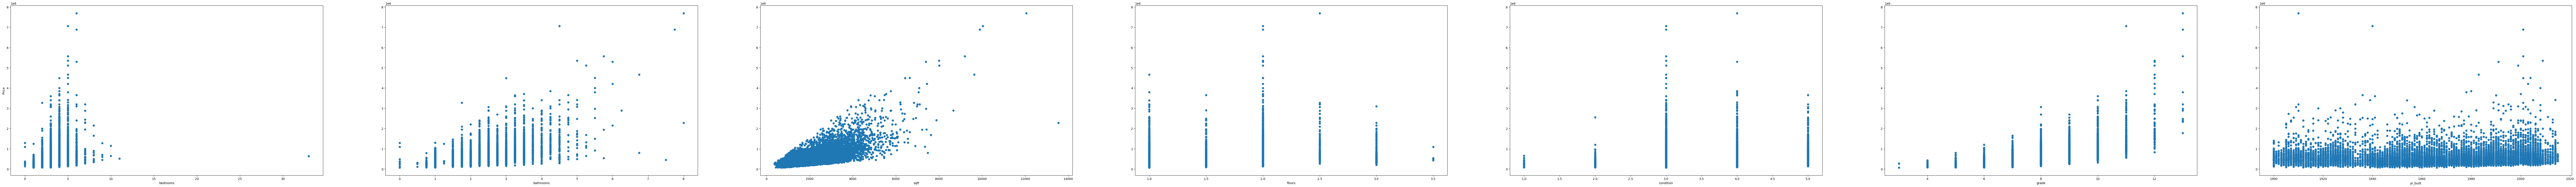

In [186]:
# Visualize the dataset by plotting each features versus the price 
fig, ax = plt.subplots(1, 7, figsize=(150, 10), sharey=False)
for i in range(len(ax)):
    ax[i].scatter([x[i] for x in X_train], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price")
plt.show()

These 7 graphs represents the dataset features (x-axis) versus the price (y-axis).

<h2>4 - The model</h2>

In supervised machine learning, the algorithm learns to create a reasonably accurate prediction of the 'target' by observing correct pairs of 'input' and the desired 'target' (output).

In our case it is by seeing correct pairs of house's features (bedrooms, bathrooms, sqft, floors, condition, grade, yr_built) and the price associated with it that the algorithm will learn to predict an accurate price when we give it some house's features.

The model we will use to predict the house's prices will be a function. Indeed, the input of this function is going to be the house's features and the output of this function will be the price.

Let's see how our function is going to be. (See image I did down below)

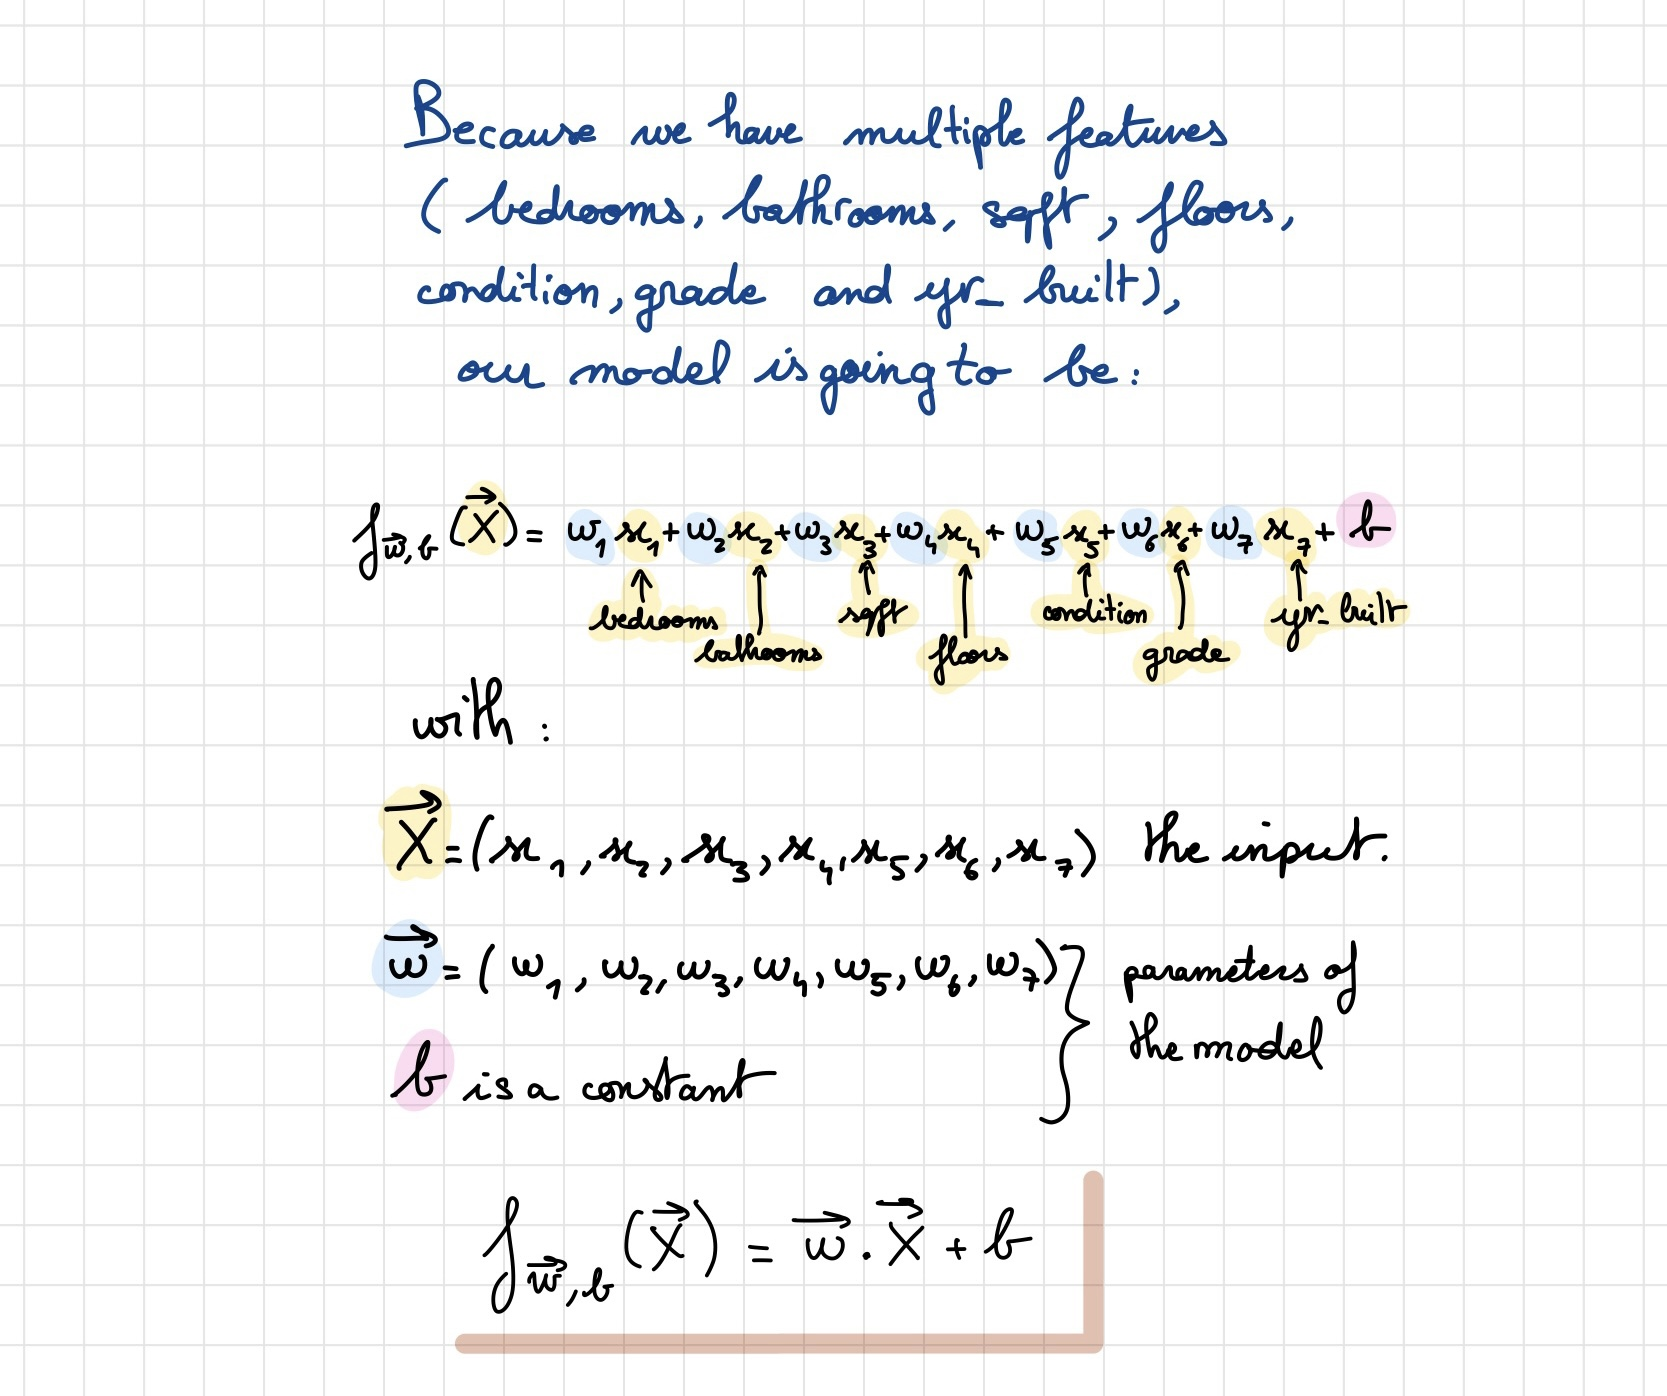

In [187]:
# Display the image "Note-1.png"
display(Image(filename='Note-1.png'))

<h2>5 - The cost function</h2>

To have our function that will predict the houses' price , we  need to find the function's parameters: the vector w and the constant b.
However, we need to find w and b so the predicted 'target' is close to the actual 'target' for all pairs ('input', 'target').

To measre that we use the Cost function.

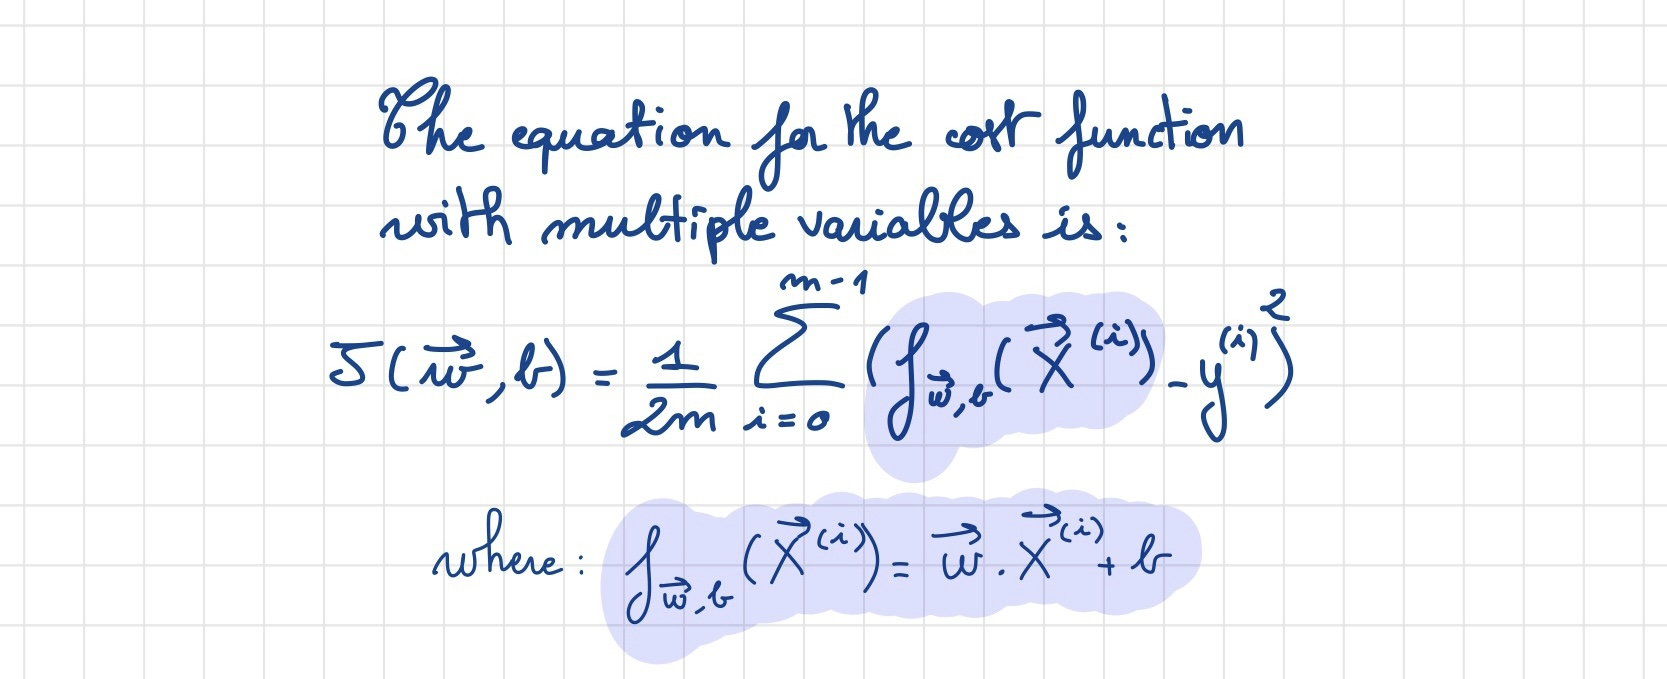

In [188]:
# Display the image "Note-2.png"
display(Image(filename='Note-2.png'))

The cost function measures the difference between the predicted 'target' and the actual 'target.' So, the closer the cost function is to 0, the better our model is.

<h3>Cost function in Python:</h3>

In [189]:
def cost_function(X, y, w, b):
    """
    arguments:
      X : Matrix of the 'inputs' data of size n,m
      y : List of the 'targets' data of lenght m
      w : Vector w of size p (parameters for prediction)
      b : Scalar b for prediction

    return: cost : Return the cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

<h2>5 - Gradient descent</h2>

To find the parameters w and b that will give us the smallest possible cost Jwe will use the gradient descent alogorithm.
Let's first see how gradient descent works.

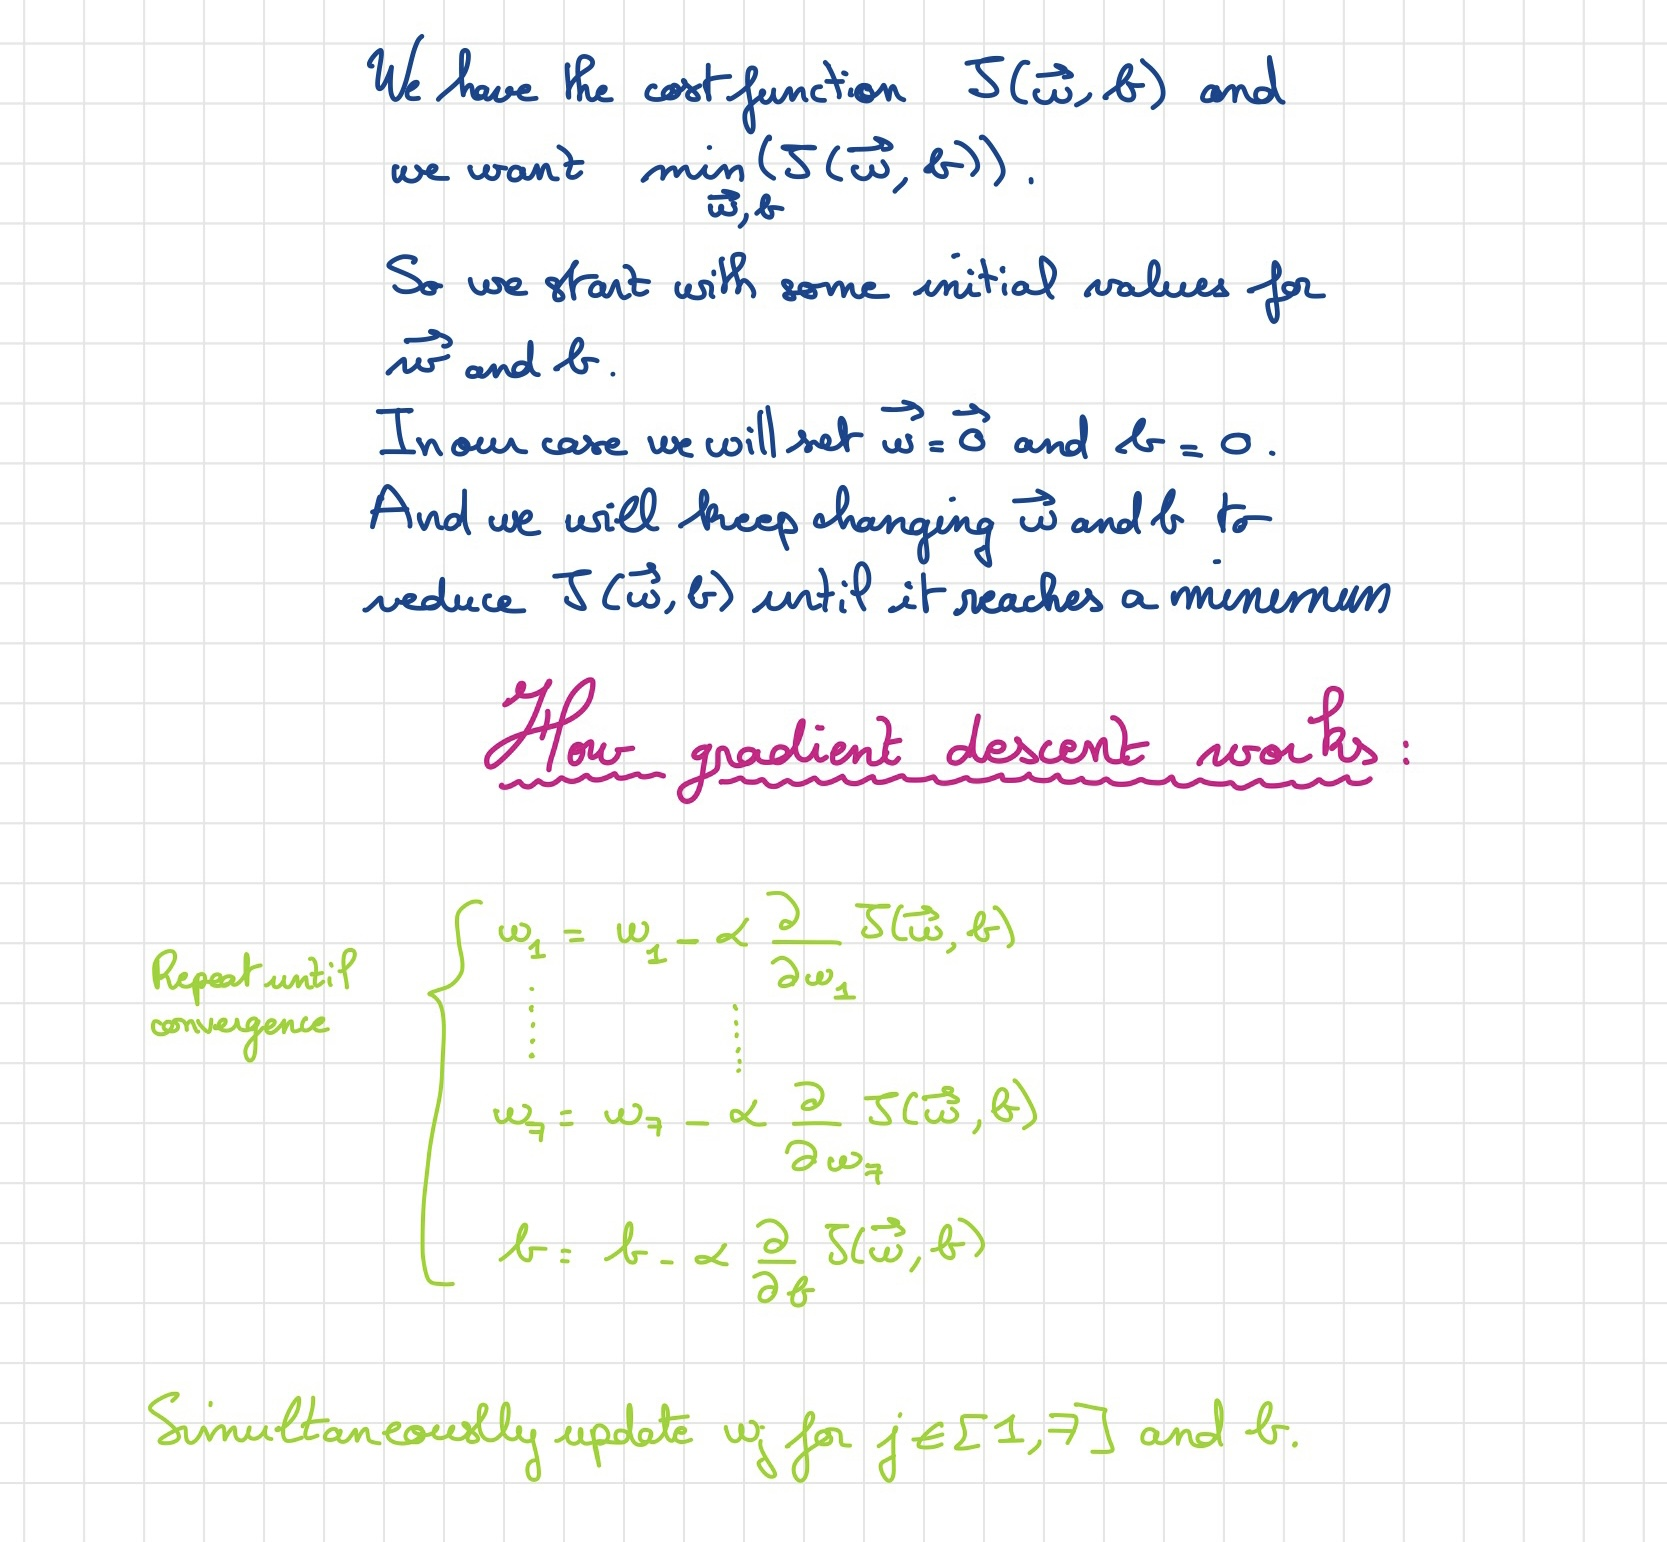

In [190]:
# Display the image "Note-3.png"
display(Image(filename='Note-3.png'))

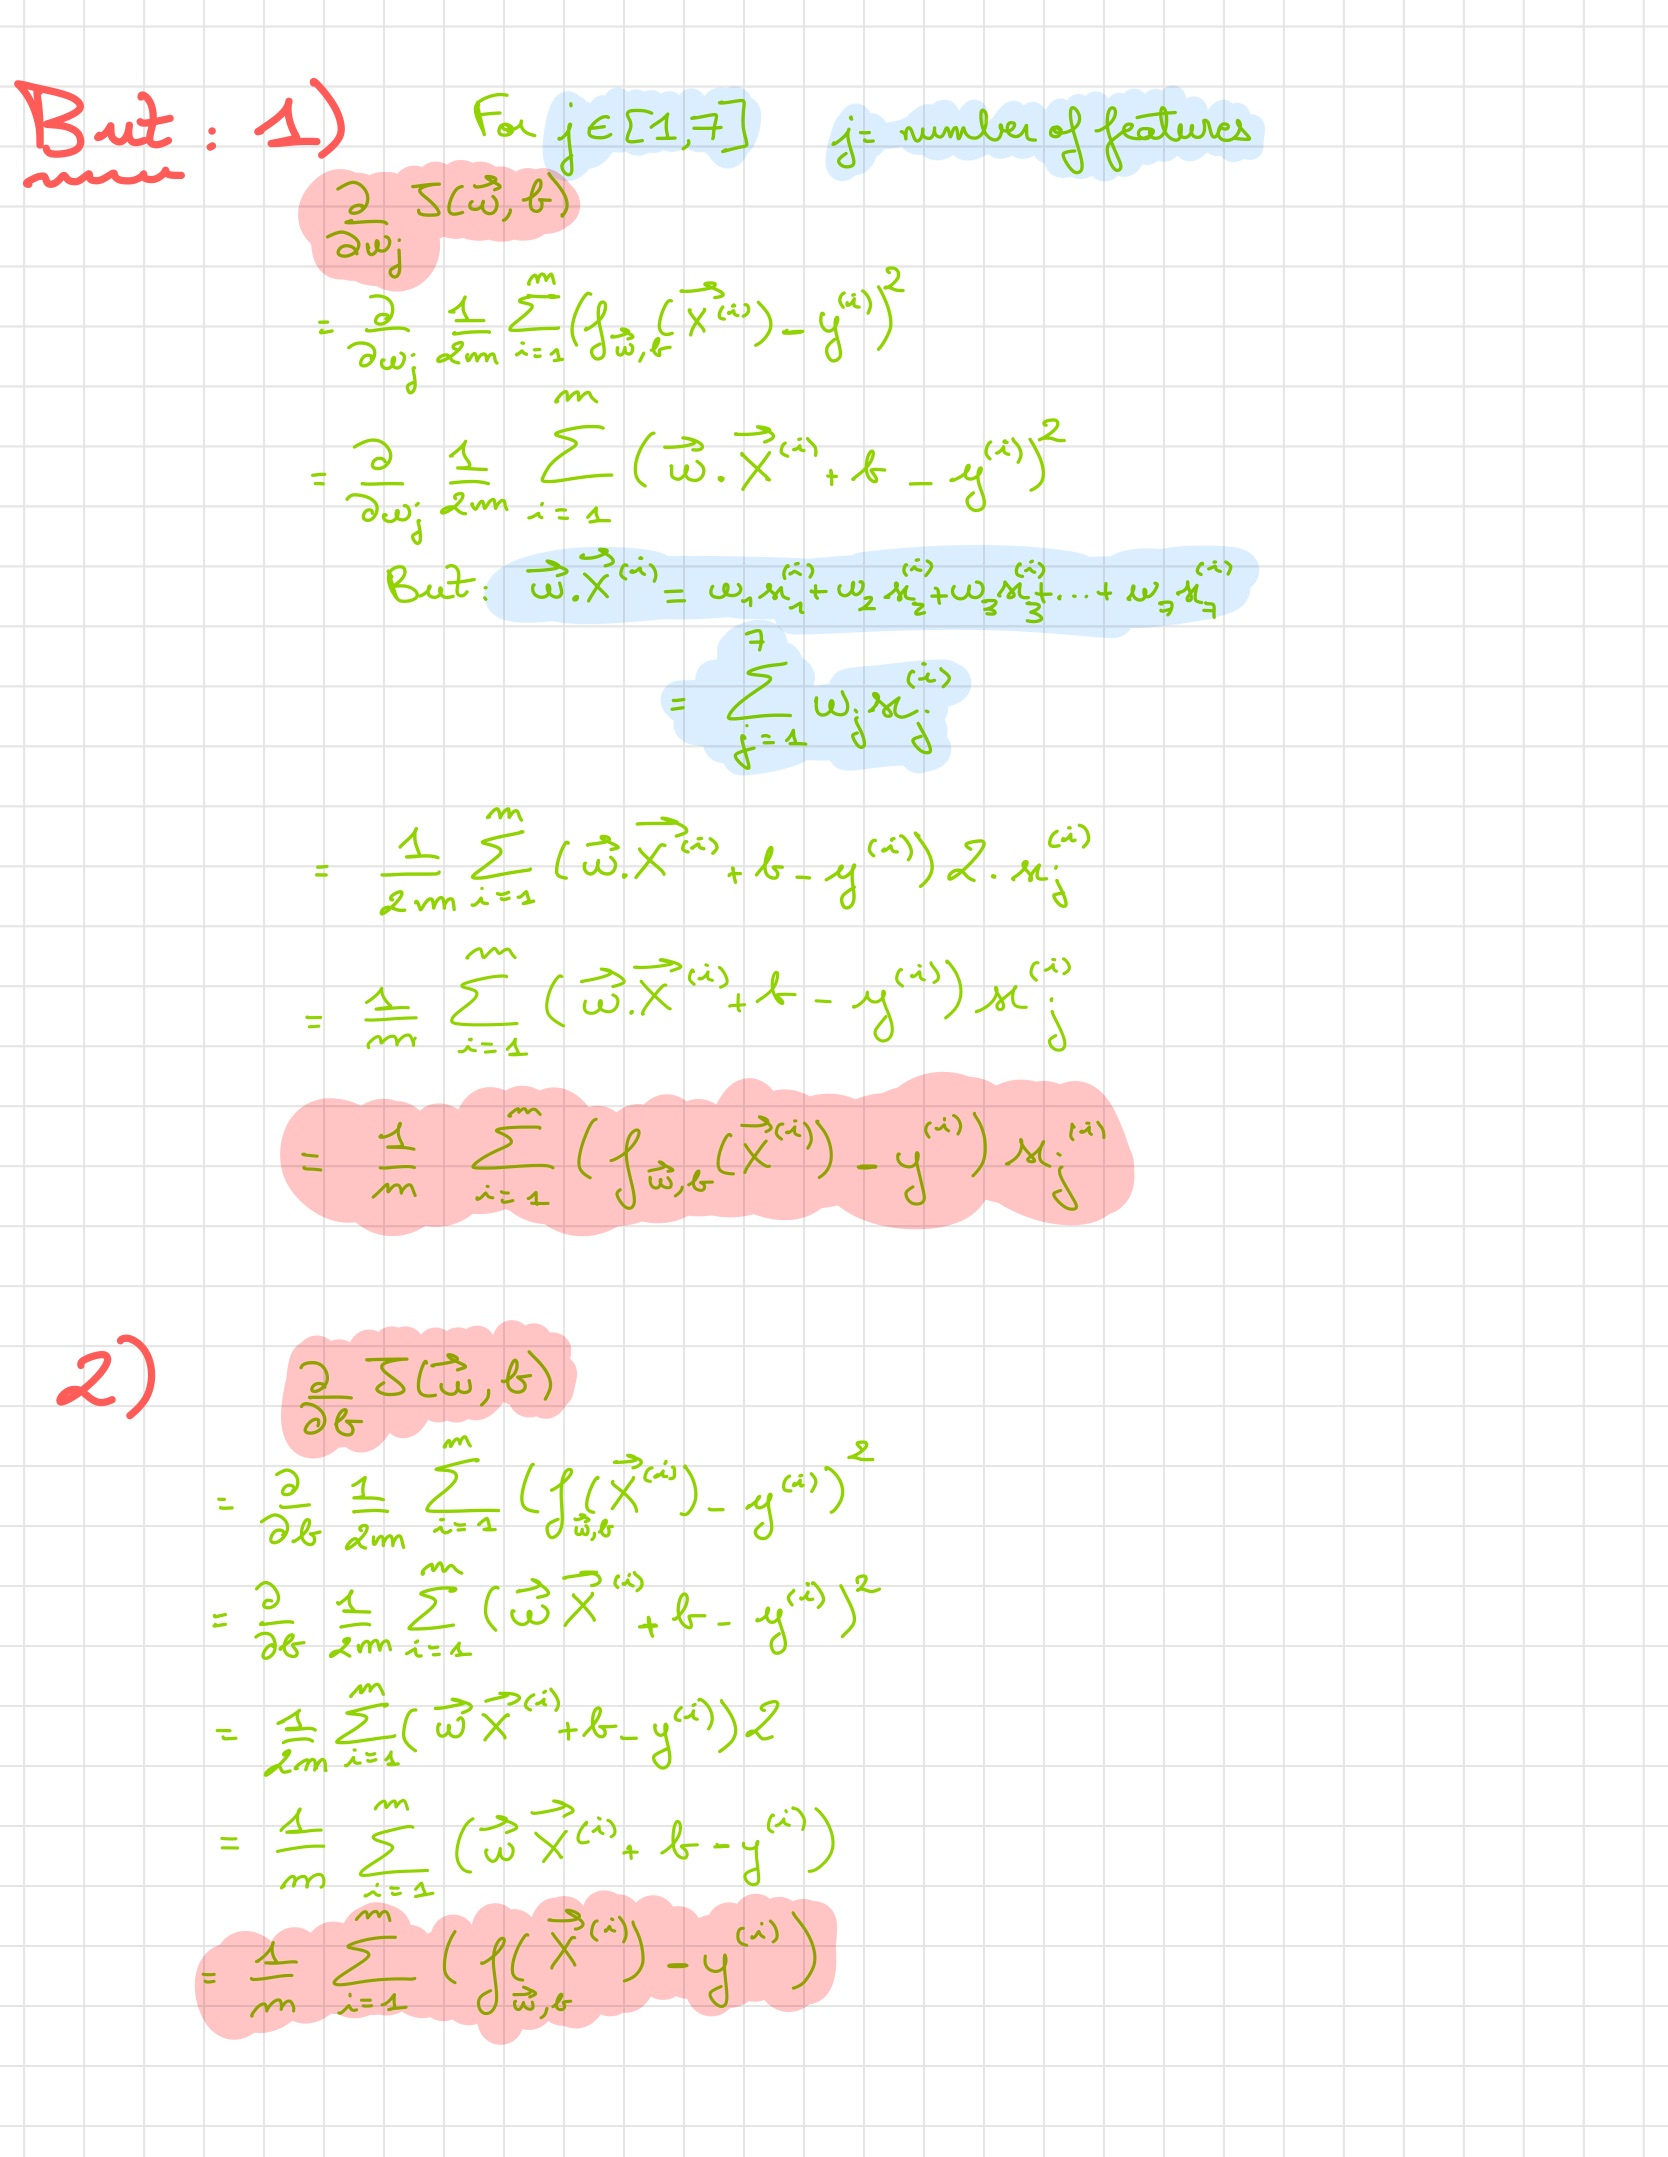

In [191]:
# Display the image "Note-4.png"
display(Image(filename='Note-4.png'))

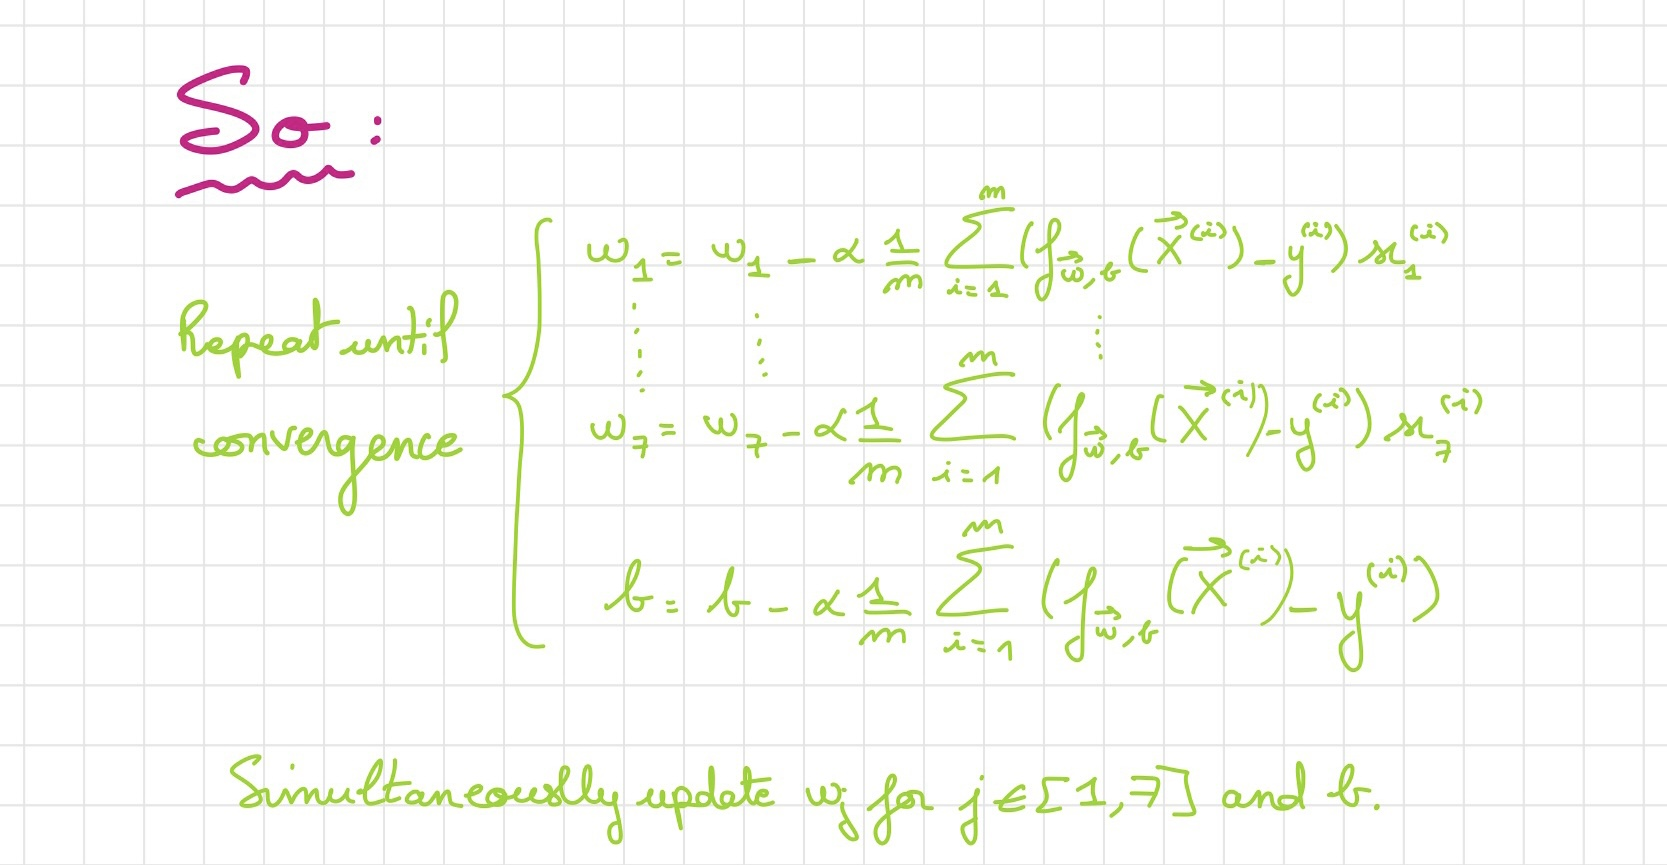

In [192]:
# Display the image "Note-5.png"
display(Image(filename='Note-5.png'))

<h3>Python implementation of gradient descent:</h3>

In [193]:
def gradient_descent(X, y, cost_function, alpha, iterations):
    """
    
    arguments:
      X : Matrix of the 'inputs' data of size n,m
      y : List of the 'targets' data of lenght m
      alpha : Learning rate
      iterations : number of iterations to run gradient descent

    return: 
        w : Updated values of w of the model after running gradient descent
        b : Updated value of b of the model after running gradient descent
        store: Updated dictionnary used for visualisation
        
    """
    
    m,n = X.shape
    
    w = np.zeros(n)
    b = 0

    # A dictionnary to store values at each iteration for visualization
    store={}
    #Store the cost values at each iteration..
    store["cost"] = [];
    #Store parameter values at each iteration.
    store["parameters"] = [];
    #Store gradient values at each iteration.
    store["gradients"]=[];
    #Store the iteration number at each iteration.
    store["iterations"]=[];

    #Control how often data is saved or recorded during the gradient descent process
    save_interval = np.ceil(iterations/10000)

    print(f"Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for iteration in range(iterations):
        
        # Calculate the gradient and update the parameters
        #dj_db,dj_dw = gradient_function(X, y, w, b)   

        dj_dw = np.zeros((n,))
        dj_db = 0.

        for i in range(m):                             
            err = (np.dot(X[i], w) + b) - y[i]   
            for j in range(n):                         
                dj_dw[j] = dj_dw[j] + err * X[i,j]    
            dj_db = dj_db + err                        
        dj_dw = dj_dw/m                                
        dj_db = dj_db/m

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db

        #Control when to save data during the gradient descent process so we collect data at 
        #regular intervals without saving it for every single iteration which is computationally expensive.
        if iteration == 0 or iteration % save_interval == 0:     
            store["cost"].append(cost_function(X, y, w, b))
            store["parameters"].append([w,b])
            store["gradients"].append([dj_dw,dj_db])
            store["iterations"].append(iteration)

        # Print cost every at intervals 20 times or as many iterations if < 20
        if iteration% math.ceil(iterations/20) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"{iteration:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")


    print(f"w,b found by gradient descent: w: {w}, b: {b:0.2f}")
       
    return w, b, store

In [194]:
w, b, store = gradient_descent(X_train, y_train, cost_function, alpha=1.2e-7, iterations=500)

Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.15167e+10  2.3e-01  1.5e-01  1.6e+02  9.8e-02  6.4e-02 -1.9e+06 -1.2e+06 -1.3e+09 -8.2e+05 -5.3e+05
       25 3.49010e+10  6.8e-02  1.5e-01  2.4e+02  6.6e-02  1.3e-02  4.2e+04 -1.9e+02 -1.6e+07  5.2e+03  8.8e+03
       50 3.41997e+10 -4.4e-02  1.5e-01  2.7e+02  5.7e-02 -1.6e-03  3.4e+04  1.7e+03 -5.4e+06  1.2e+03  2.2e+03
       75 3.41242e+10 -1.4e-01  1.4e-01  2.8e+02  5.6e-02 -4.3e-03  3.2e+04  2.3e+03 -1.8e+06 -1.6e+02  5.7e+01
      100 3.41160e+10 -2.4e-01  1.4e-01  2.9e+02  5.8e-02 -3.1e-03  3.1e+04  2.5e+03 -5.8e+05 -6.0e+02 -6.5e+02
      125 3.41151e+10 -3.3e-01  1.3e-01  2.9e+02  6.0e-02 -7.6e-04  3.1e+04  2.6e+03 -1.9e+05 -7.4e+02 -8.8e+02
      150 3.41150e+10 -4.2e-01  1.2e-01  2.9e+02  6.2e-02  2.0e-03  3.0e+04  2.6e+03 -6.2e+04 -7.9e+02 

We can see that the learning rate is converging (the gradient descent took 20 seconds). Let's know visualize it in a graph. 

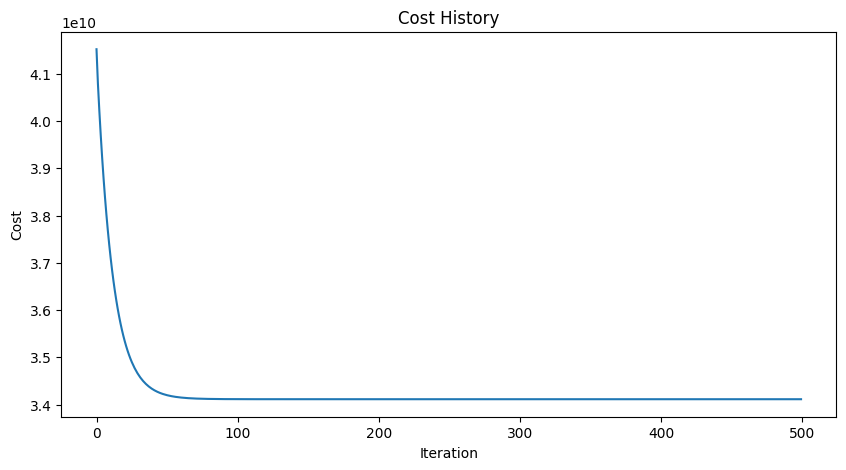

In [195]:
# Extract cost history from the store dictionary
cost_history = store["cost"]

# Set graph size
plt.figure(figsize=(10, 5))

# Create a plot of the cost history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")

plt.show()

On the graph we can see that the cost is converging towards a value which is good. Let's plot w0 in function of the cost.

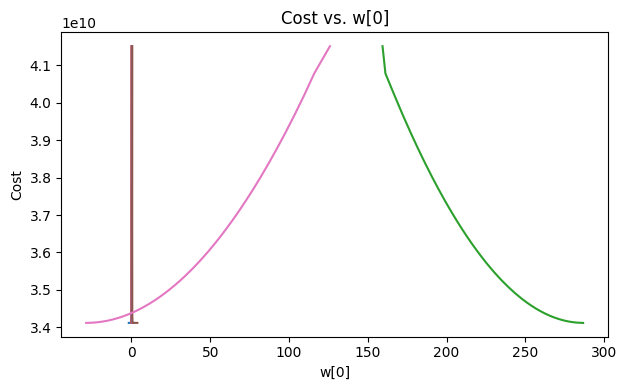

In [196]:
w0_history = [parameters[0] for parameters in store["parameters"]]
# Create a plot of the cost history
plt.figure(figsize=(12, 4))
# Plot cost vs. w[0]
plt.subplot(1, 2, 2)
plt.plot(w0_history, cost_history)
plt.xlabel("w[0]")
plt.ylabel("Cost")
plt.title("Cost vs. w[0]")

plt.tight_layout()
plt.show()

We can see that w0 is decreasing as it should.

As we can see, the learning rate is correct, the cost is indeed converging.

<h3>
    Lets's see what happen with a learning rate that is too large.
</h3>

In [197]:
w_test, b_test, store_test = gradient_descent(X_train, y_train, cost_function, alpha=2.9e-7, iterations=500)

Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.06082e+11  5.5e-01  3.6e-01  3.9e+02  2.4e-01  1.5e-01 -1.9e+06 -1.2e+06 -1.3e+09 -8.2e+05 -5.3e+05
       25 1.10715e+20 -5.9e+03 -3.7e+03 -3.8e+06 -2.5e+03 -1.7e+03  3.4e+10  2.2e+10  2.2e+13  1.5e+10  9.8e+09
       50 3.35295e+28  1.0e+08  6.5e+07  6.7e+10  4.4e+07  2.9e+07 -5.9e+14 -3.8e+14 -3.9e+17 -2.5e+14 -1.7e+14
       75 1.01542e+37 -1.8e+12 -1.1e+12 -1.2e+15 -7.6e+11 -5.1e+11  1.0e+19  6.5e+18  6.7e+21  4.4e+18  3.0e+18
      100 3.07515e+45  3.1e+16  2.0e+16  2.0e+19  1.3e+16  8.9e+15 -1.8e+23 -1.1e+23 -1.2e+26 -7.6e+22 -5.2e+22
      125 9.31293e+53 -5.4e+20 -3.4e+20 -3.5e+23 -2.3e+20 -1.6e+20  3.1e+27  2.0e+27  2.0e+30  1.3e+27  9.0e+26
      150 2.82037e+62  9.4e+24  6.0e+24  6.1e+27  4.0e+24  2.7e+24 -5.5e+31 -3.4e+31 -3.6e+34 -2.3e+31 

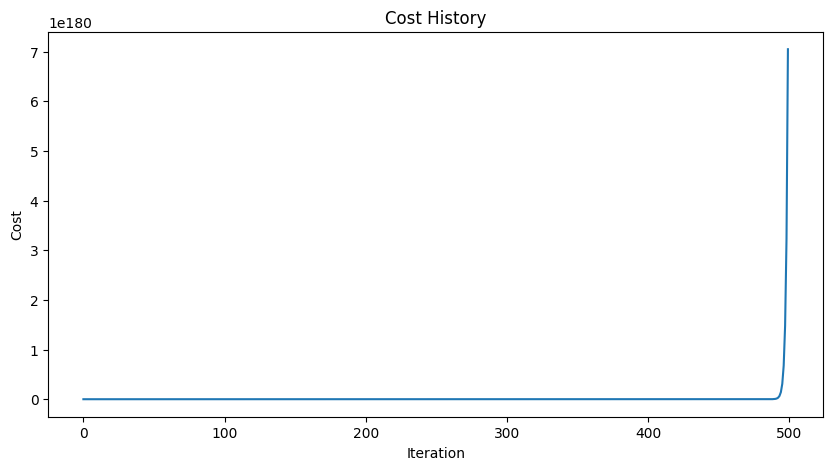

In [198]:
# Extract cost history from the store dictionary
cost_history = store_test["cost"]

# Set graph size
plt.figure(figsize=(10, 5))

# Create a plot of the cost history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")

plt.show()

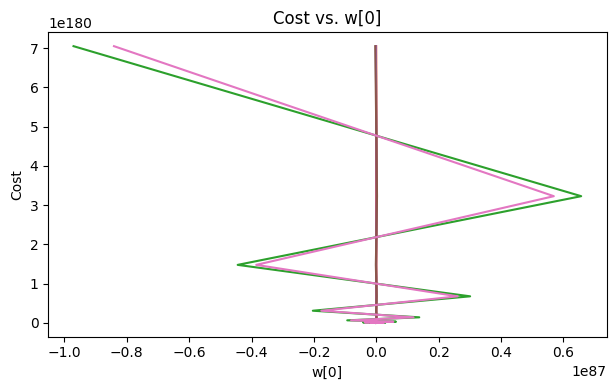

In [199]:
w0_history = [parameters[0] for parameters in store_test["parameters"]]
# Create a plot of the cost history
plt.figure(figsize=(12, 4))
# Plot cost vs. w[0]
plt.subplot(1, 2, 2)
plt.plot(w0_history, cost_history)
plt.xlabel("w[0]")
plt.ylabel("Cost")
plt.title("Cost vs. w[0]")

plt.tight_layout()
plt.show()

When the learning rate is too large the cost and w0 are diverging.

<h2>5 - Compare the predicted target and the actual targets</h2>

<h3>Price and Actual targets versus Prince and Predicted targets</h3>

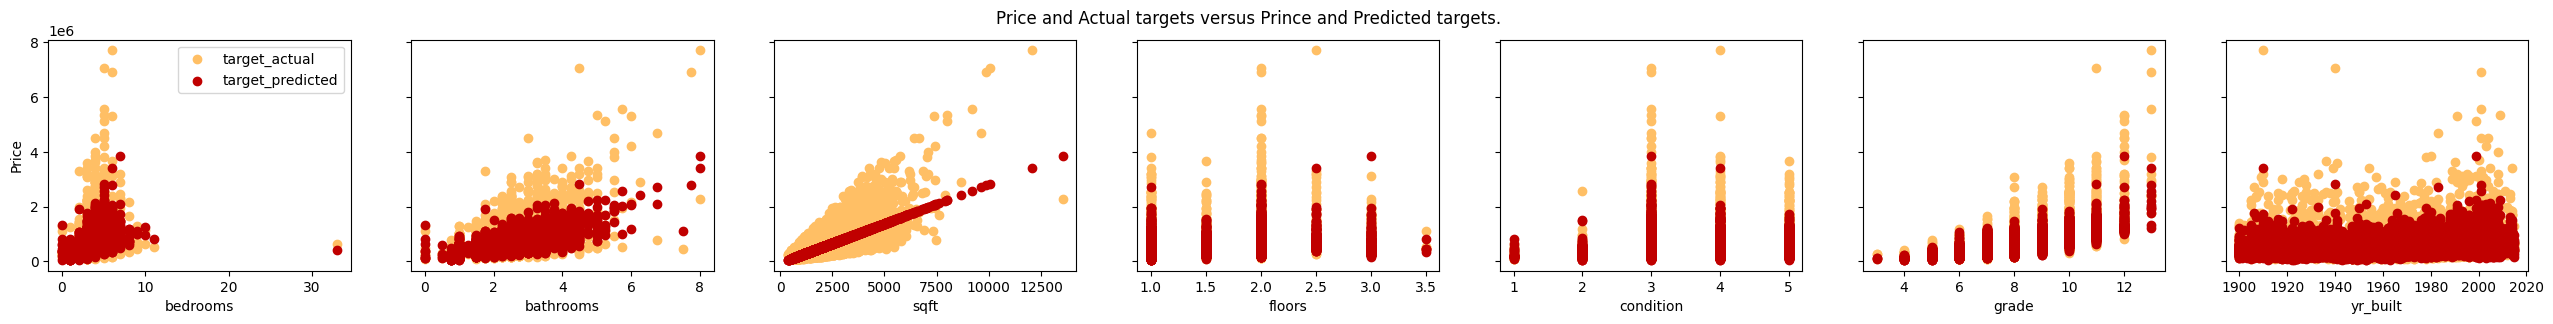

In [200]:
#Colors
yellow = '#FFBF65'
red = '#C00000'

# Predict target using normalized features
m = X_train.shape[0]
y_predicted = np.zeros(m)
for i in range(m):
    y_predicted[i] = np.dot(X_train[i], w) + b

    # Plot predictions and targets versus original features    
fig,ax=plt.subplots(1,7,figsize=(32, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, color=yellow, label = 'target_actual')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_predicted,color=red, label = 'target_predicted')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Price and Actual targets versus Prince and Predicted targets.")

plt.show()

The results look good and correct.
For the 'sqft' graph even if the 'target_predicted' poits are forming a linear function, it is still in the same 'area' on the graph as the 'target_actual' points, by that I mean that the 'target_actual' are wrappping the 'target_predicted' line.

<h3>Actual targets versus Predicted targets</h3>

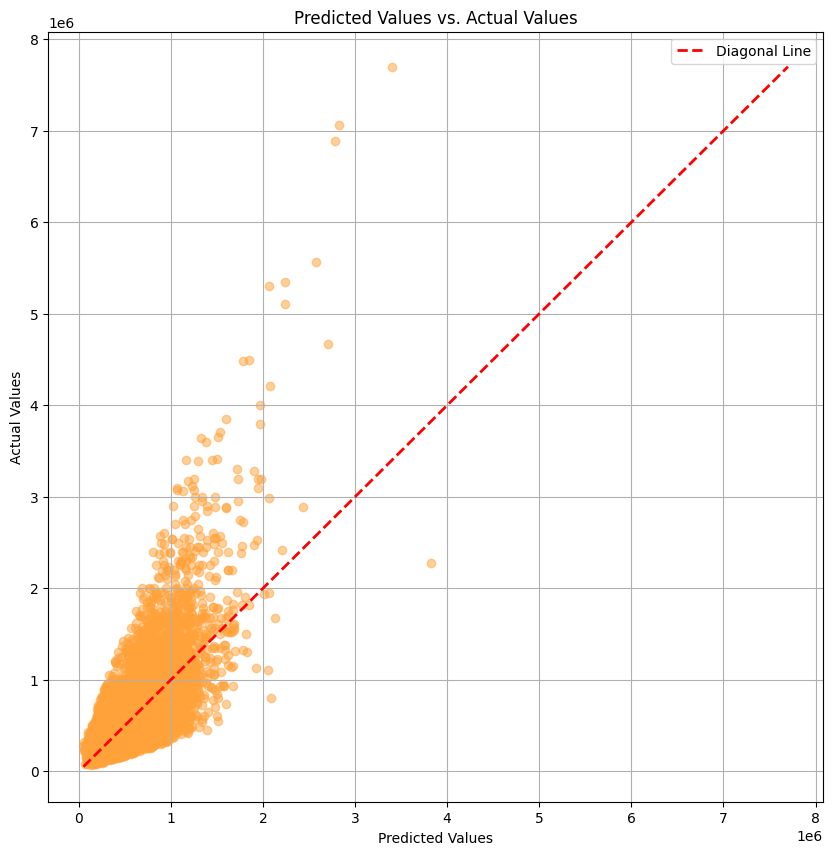

In [201]:
yellow = '#FFA23A'

plt.figure(figsize=(10, 10))
plt.scatter(y_predicted, y_train, alpha=0.5, color = yellow)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted Values vs. Actual Values")
plt.grid(True)

# Add a diagonal line
min_val = min(y_predicted.min(), y_train.min())
max_val = max(y_predicted.max(), y_train.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label='Diagonal Line')

plt.legend()
plt.show()

In this graph, each point represents an example in the dataset.
The x-axis corresponds to the predicted targets, and the y-axis corresponds to the actual target. 
It allows us to visually assess how well our model is. Ideally, we want the points to be close to a diagonal line, indicating a strong correlation between predictions and actual values and this is what we have.

<h2>6 - Conclusion</h2>

Let's know predict a house's price for an actual value in our dataset.

In [202]:
x_house = np.array([3,1.00,1180,1.0,3,7,1955])
x_house_price = 221900
x_house_predict_price = np.dot(x_house, w) + b
print(f" For a house with {x_house[0]} bedroom(s), {x_house[1]} bathroom(s), {x_house[2]} sqft, {x_house[3]} floor(s), a rate of {x_house[4]} for the condition, a grade of {x_house[5]} and built in the year {x_house[6]} we have a price of ${x_house_predict_price}.")

 For a house with 3.0 bedroom(s), 1.0 bathroom(s), 1180.0 sqft, 1.0 floor(s), a rate of 3.0 for the condition, a grade of 7.0 and built in the year 1955.0 we have a price of $282230.0284269115.


In the dataset the price is $221900.0.

In [203]:
print(f"{x_house_predict_price} - {x_house_price} = ${x_house_predict_price - x_house_price}.")

282230.0284269115 - 221900 = $60330.02842691151.


The difference is not huge but also not negligible, but in the scope of the project it is correct.

<center>
    <h3>
        So we can conclude that our model is working. 
    </h3>
</center>

<h2>6 - Optimization</h2>

To optimize our model, let's normalize the data.
By using normalisation, we will rescale the dataset so all the features will have a similar range and the gradient descent algorythm will run much faster. Initially our gradient descent algorithm took 20 seconds.
I will use z-score normalisation. After the normalisation all the features will have a mean of 0 and a standard deviation of 1.

<h3>Python implementation of z-score normalisation function:</h3>

In [204]:
def zscore_normalize_features(X):
    mu     = np.mean(X,axis=0)  
    sigma  = np.std(X,axis=0)
    X_norm = (X - mu)/sigma
    return (X_norm, mu, sigma)

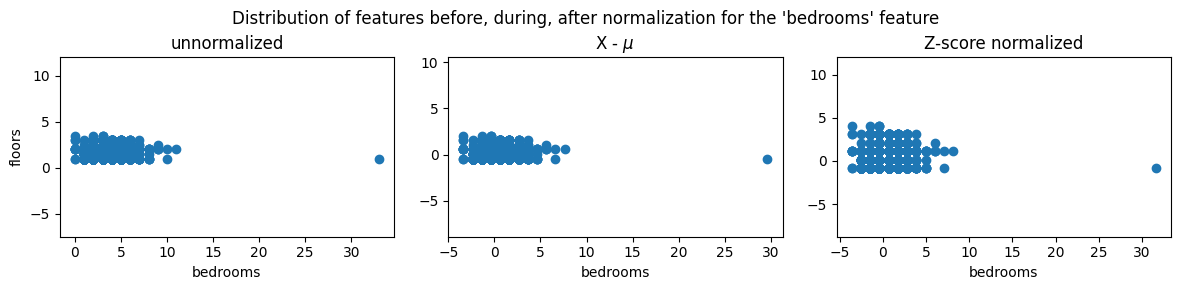

In [205]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribution of features before, during, after normalization for the 'bedrooms' feature")
plt.show()

Normalisation allows features centered at 0 with a similar scale.

In [206]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [3.36591826e+00 2.06208993e+00 2.05386053e+03 1.43255282e+00
 3.44970806e+00 7.59260820e+00 1.96729742e+03], 
X_sigma = [9.37156861e-01 7.58762859e-01 9.04411169e+02 5.09653717e-01
 6.66561719e-01 1.16838437e+00 2.79358755e+01]
Peak to Peak range by column in Raw        X:[3.300e+01 8.000e+00 1.317e+04 2.500e+00 4.000e+00 1.000e+01 1.150e+02]
Peak to Peak range by column in Normalized X:[35.21288845 10.54347865 14.5619608   4.90529141  6.00094468  8.55882728
  4.11657047]


In [207]:
w_norm, b_norm, store_norm = gradient_descent(X_norm, y_train, cost_function, alpha=2e-1, iterations=50)

Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 1.32658e+11  2.2e+04  3.8e+04  5.1e+04  2.0e+04  1.1e+05 -1.1e+05 -1.9e+05 -2.6e+05 -1.0e+05 -5.3e+05
        3 5.53580e+10  1.8e+04  5.4e+04  9.9e+04  1.9e+04  3.1e+05  2.2e+04 -3.8e+03 -4.9e+04  1.3e+04 -2.7e+05
        6 3.46830e+10  3.9e+03  5.3e+04  1.2e+05  1.3e+04  4.2e+05  2.3e+04  3.0e+03 -2.8e+04  8.3e+03 -1.4e+05
        9 2.87105e+10 -8.4e+03  5.1e+04  1.3e+05  9.6e+03  4.8e+05  1.9e+04  3.3e+03 -1.9e+04  4.5e+03 -7.2e+04
       12 2.68580e+10 -1.8e+04  4.9e+04  1.4e+05  7.7e+03  5.0e+05  1.4e+04  2.9e+03 -1.3e+04  2.6e+03 -3.7e+04
       15 2.62273e+10 -2.5e+04  4.8e+04  1.5e+05  6.6e+03  5.2e+05  1.0e+04  2.5e+03 -9.8e+03  1.6e+03 -1.9e+04
       18 2.59885e+10 -3.0e+04  4.6e+04  1.5e+05  5.9e+03  5.3e+05  7.4e+03  2.1e+03 -7.3e+03  1.0e+03 

The gradient descent run much faster about 3 seconds. Let's see the graph.
Indeed, with normalisation we use a small amount of iterations and a bigger learning rate.

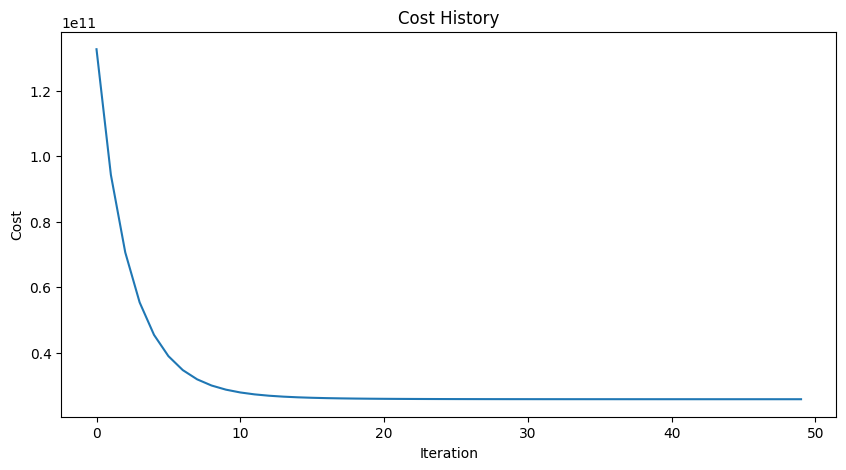

In [208]:
# Extract cost history from the store dictionary
cost_history_norm = store_norm["cost"]

# Set graph size
plt.figure(figsize=(10, 5))

# Create a plot of the cost history
plt.plot(range(len(cost_history_norm)), cost_history_norm)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")

plt.show()

On the graph we can see that the cost is converging towards a value which is good. Let's plot w0 in function of the cost.

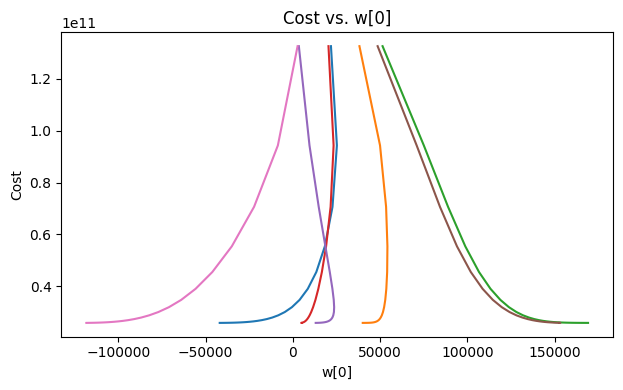

In [209]:
w0_history = [parameters[0] for parameters in store_norm["parameters"]]
# Create a plot of the cost history
plt.figure(figsize=(12, 4))
# Plot cost vs. w[0]
plt.subplot(1, 2, 2)
plt.plot(w0_history, cost_history_norm)
plt.xlabel("w[0]")
plt.ylabel("Cost")
plt.title("Cost vs. w[0]")

plt.tight_layout()
plt.show()

We can see that w0 is decreasing as it should but more rapidly (the slope is 'higher')

<h3>Compare the predicted target and the actual targets after normalisation</h3>

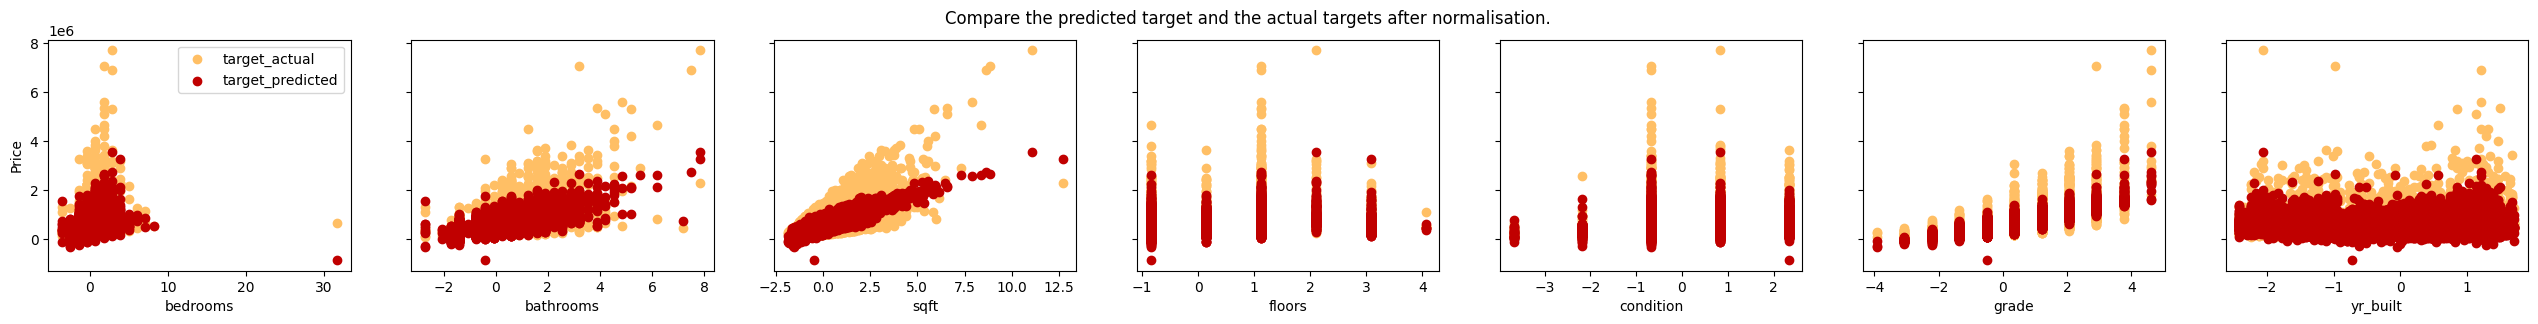

In [210]:
#Colors
yellow = '#FFBF65'
red = '#C00000'

# Predict target using normalized features
m = X_norm.shape[0]
y_predicted_norm = np.zeros(m)
for i in range(m):
    y_predicted_norm[i] = np.dot(X_norm[i], w_norm) + b_norm

    # Plot predictions and targets versus original features    
fig,ax=plt.subplots(1,7,figsize=(32, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train, color=yellow, label = 'target_actual')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_norm[:,i],y_predicted_norm,color=red, label = 'target_predicted')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Compare the predicted target and the actual targets after normalisation.")

plt.show()

<h3>Actual targets versus Predicted targets after normalisation</h3>

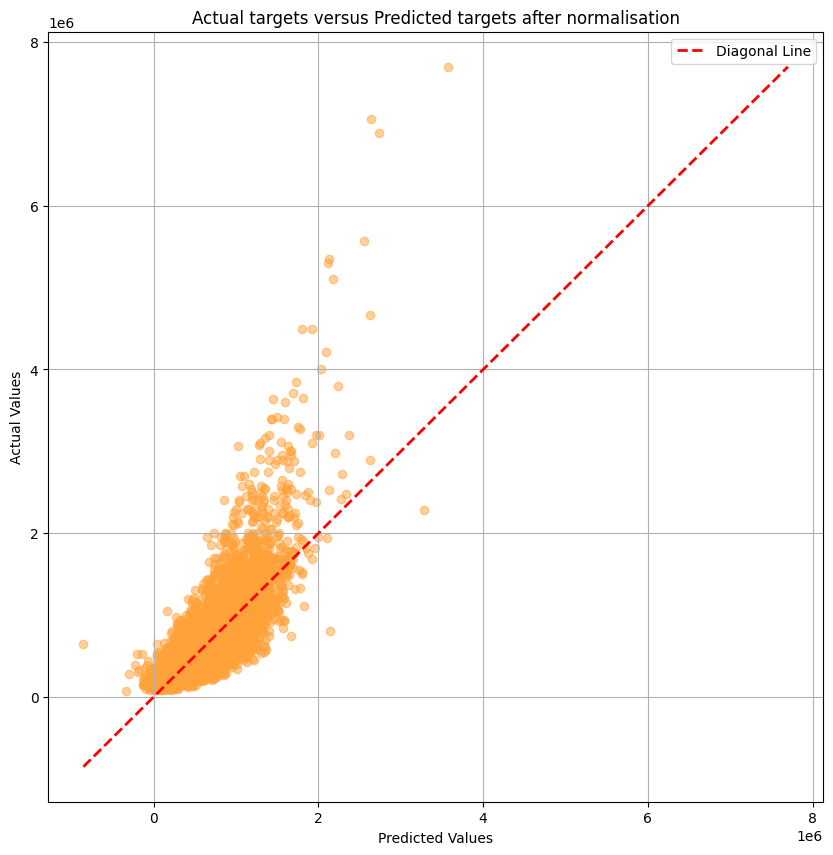

In [211]:
yellow = '#FFA23A'

plt.figure(figsize=(10, 10))
plt.scatter(y_predicted_norm, y_train, alpha=0.5, color = yellow)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual targets versus Predicted targets after normalisation")
plt.grid(True)

# Add a diagonal line
min_val = min(y_predicted_norm.min(), y_train.min())
max_val = max(y_predicted_norm.max(), y_train.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label='Diagonal Line')

plt.legend()
plt.show()

On the graphs "Compare the predicted target and the actual targets after normalisation" and on the graph "Actual targets versus Predicted targets after normalisation" the plot is correct. Normalisation is working.

<h3>Conclusion of the optimisation</h3>

Let's know predict a house's price after normalisation using the same house feature used in our first conclusion.

In [212]:
x_house_norm = (x_house - X_mu) / X_sigma
x_house_predict_price_norm = np.dot(x_house_norm, w_norm) + b_norm
print(f" For a house with {x_house[0]} bedroom(s), {x_house[1]} bathroom(s), {x_house[2]} sqft, {x_house[3]} floor(s), a rate of {x_house[4]} for the condition, a grade of {x_house[5]} and built in the year {x_house[6]} we have a price of ${x_house_predict_price_norm}.")

 For a house with 3.0 bedroom(s), 1.0 bathroom(s), 1180.0 sqft, 1.0 floor(s), a rate of 3.0 for the condition, a grade of 7.0 and built in the year 1955.0 we have a price of $292239.8299528832.


In [213]:
print(f"The difference between the price predicted before normalisation and the price predicted after normalisation is: ${x_house_predict_price_norm - x_house_predict_price}")

The difference between the price predicted before normalisation and the price predicted after normalisation is: $10009.801525971678


This difference is negligible.

We have used the z-score normalisation, and it works. Moreover it has made our algorithm run faster.

<h2 style="text-align:center; color:pink">Conclusion</h2>

We have successfuly created a model that help us to predict a house's price based on its features (bedrooms, bathrooms, sqft, floors, condition, grade, yr_built) and we have optimized so it can run faster.

<h1 style="text-align:center; color:darkred">Soraya PANAMBALOM</h1>